Data = https://www.kaggle.com/jessemostipak/hotel-booking-demand

#### Task Details

Can we predict the possibility of a booking for a hotel based on the previous_cancellation as the target?

Expected Submission
Two columns --> Hotel Name and Booking_Possibility (0 or 1)

### Подключение библиотек и скриптов

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import matplotlib.image as img
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})
#plt.style.available

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 50)

**Пути к директориям и файлам**

In [4]:
DATASET_PATH = '../data/hotel_bookings.csv'
PREPARED_DATASET_PATH = '../data/hotel_booking_prepared'

### Загрузка данных

**Data description**

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.

**Context**
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

This hotel booking dataset can help you explore those questions!

**Content**
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.


* **hotel** - Hotel (H1 = Resort Hotel or H2 = City Hotel)
* **is_canceled** -  Value indicating if the booking was canceled (1) or not (0) 
* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date  
* **arrival_date_year** - Year of arrival date  
* **arrival_date_month** - Month of arrival date   
* **arrival_date_week_number** - Week number of year for arrival date 
* **arrival_date_day_of_month** - Day of arrival date 
* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel 
* **adults** - Number of adults 
* **children** - Number of children                        
* **babies** - Number of babies                     
* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal                          
* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format                        
* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”               
* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”          
* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest (1) or not (0)   
* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking
* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking
* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.
* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due
* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS   
* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No 
* **agent** - ID of the travel agency that made the booking                           
* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for        
* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer
* **customer_type** - Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of 
* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights     
* **required_car_parking_spaces** - Number of car parking spaces required by the customer
* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)
* **reservation_status** - Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out            
* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to 

In [5]:
df = pd.read_csv(DATASET_PATH)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,nan,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.00,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.00,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [6]:
df.shape

(119390, 32)

In [7]:
df['id'] = df.index.tolist()
df.set_index('id', inplace=True)

### Общая информации о данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

### Обзор данных

**Целевая переменная**

In [10]:
target_name = 'is_canceled'

In [11]:
df[target_name].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [12]:
base_feature_names = df.columns.drop(target_name).tolist()
base_feature_names

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

**Корреляция со количественными и категориальными признаками**

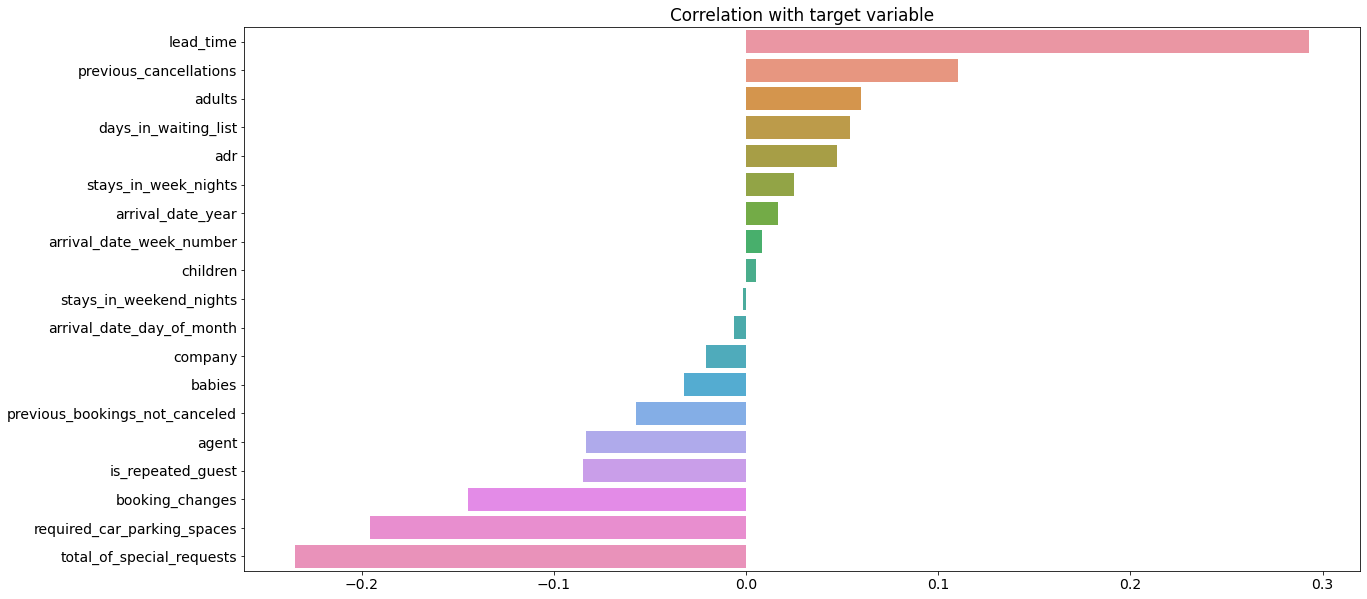

In [13]:
corr_with_target = df[base_feature_names + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(20, 10))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Категориальные переменные**

In [14]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [15]:
feature_cat_names = df.select_dtypes(include='object').columns.tolist()
feature_cat_names

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [16]:
for i in feature_cat_names:
    print(str(i) + '\n\n' + str(df[i].value_counts()) + '\n' + '*' * 100 + '\n')

hotel

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
****************************************************************************************************

arrival_date_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
****************************************************************************************************

meal

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
****************************************************************************************************

country

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
SLE        1
LCA        1
UMI        1
BDI        1
Name: country, Length: 177, dtype: int64
***********

**Количественные признаки**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,119390.00,104.01,106.86,0.00,18.00,69.00,160.00,737.00
arrival_date_year,119390.00,2016.16,0.71,2015.00,2016.00,2016.00,2017.00,2017.00
arrival_date_week_number,119390.00,27.17,13.61,1.00,16.00,28.00,38.00,53.00
arrival_date_day_of_month,119390.00,15.80,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,119390.00,0.93,1.00,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,119390.00,2.50,1.91,0.00,1.00,2.00,3.00,50.00
adults,119390.00,1.86,0.58,0.00,2.00,2.00,2.00,55.00
children,119386.00,0.10,0.40,0.00,0.00,0.00,0.00,10.00
babies,119390.00,0.01,0.10,0.00,0.00,0.00,0.00,10.00


In [18]:
feature_num_names = df.drop([target_name], axis=1).select_dtypes(include=['float64', 'int64']).\
        columns.tolist()
feature_num_names

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [19]:
for i in feature_num_names:
    print(str(i) + '\n\n' + str(df[i].value_counts()) + '\n' + '*' * 100 + '\n')

lead_time

0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
458       1
371       1
737       1
435       1
387       1
Name: lead_time, Length: 479, dtype: int64
****************************************************************************************************

arrival_date_year

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
****************************************************************************************************

arrival_date_week_number

33    3580
30    3087
32    3045
34    3040
18    2926
      ... 
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, Length: 53, dtype: int64
****************************************************************************************************

arrival_date_day_of_month

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30

**Корреляция с количественными признаками**

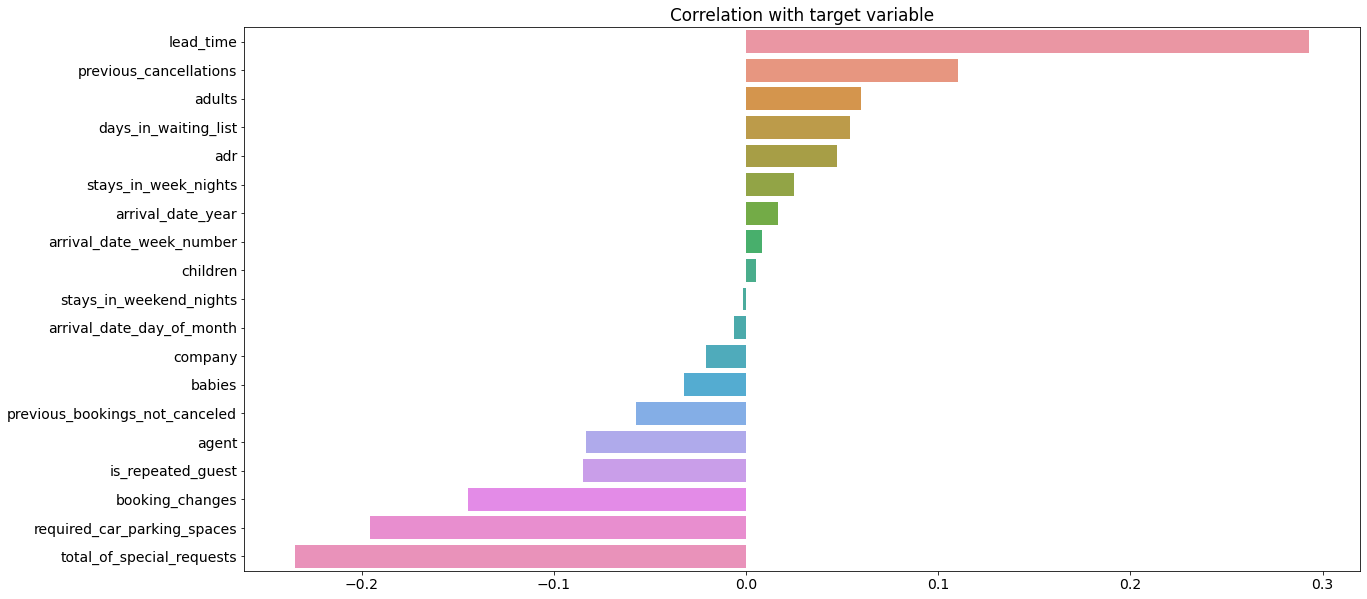

In [20]:
corr_with_target = df[feature_num_names + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(20, 10))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Матрица корреляций**

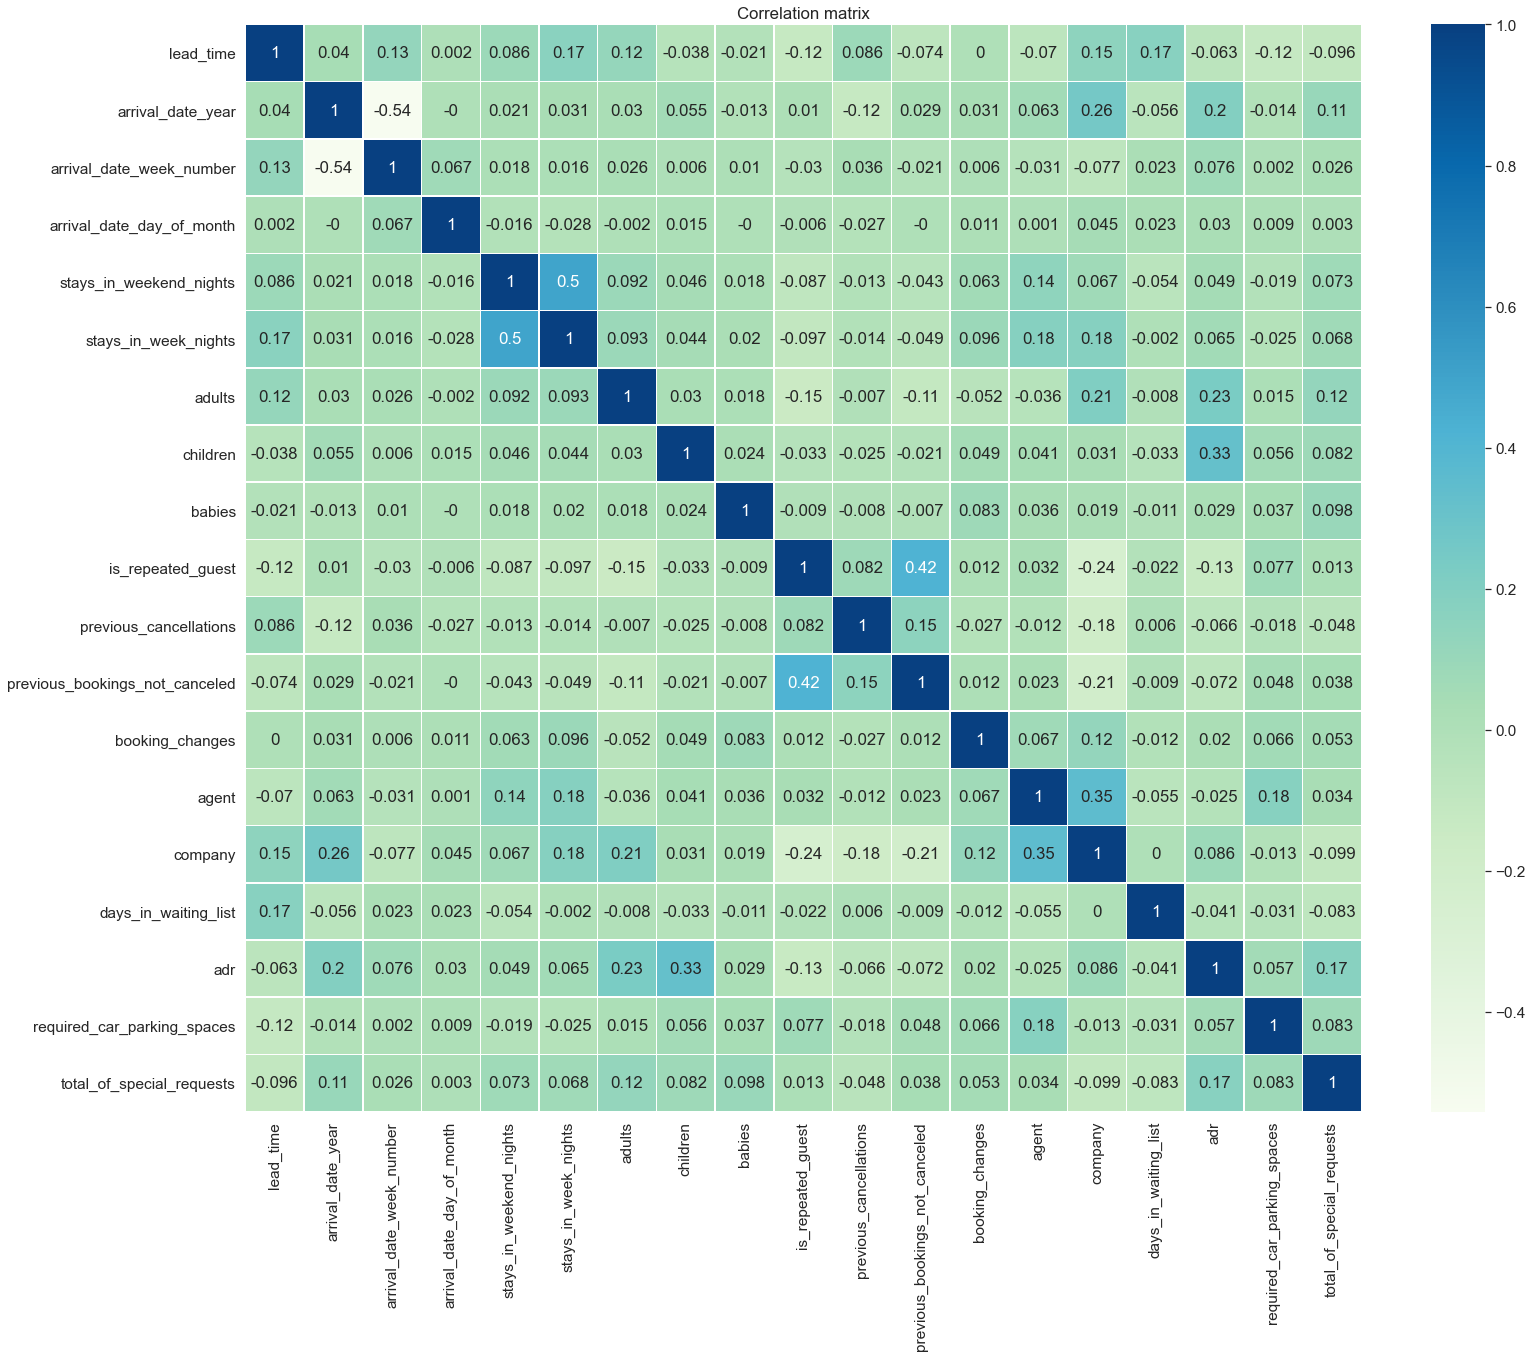

In [21]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[feature_num_names].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

### Обработка пропусков

In [22]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**country**

In [23]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DMA        1
SLE        1
LCA        1
UMI        1
BDI        1
Name: country, Length: 177, dtype: int64

In [24]:
df['country']=df['country'].replace(np.nan,'PRT')

**children**

In [25]:
df['children'].value_counts()

0.00     110796
1.00       4861
2.00       3652
3.00         76
10.00         1
Name: children, dtype: int64

In [26]:
df['children'].fillna(df['children'].mode()[0], inplace=True)

**agent**

In [27]:
df['agent'].value_counts()

9.00      31961
240.00    13922
1.00       7191
14.00      3640
7.00       3539
          ...  
213.00        1
433.00        1
197.00        1
367.00        1
337.00        1
Name: agent, Length: 333, dtype: int64

In [28]:
df['agent'].fillna(df['agent'].median(), inplace=True)

**company**

In [29]:
df['company'].value_counts()

40.00     927
223.00    784
67.00     267
45.00     250
153.00    215
         ... 
229.00      1
213.00      1
416.00      1
320.00      1
461.00      1
Name: company, Length: 352, dtype: int64

In [30]:
df = df.drop(['company'], axis = 1) # слишком много неизвестных значений

### Приведение типов

In [31]:
df['children'] = df['children'].astype(int)

In [32]:
df['agent']= df['agent'].astype(int)

### EDA - Разведочный анализ данных

In [33]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

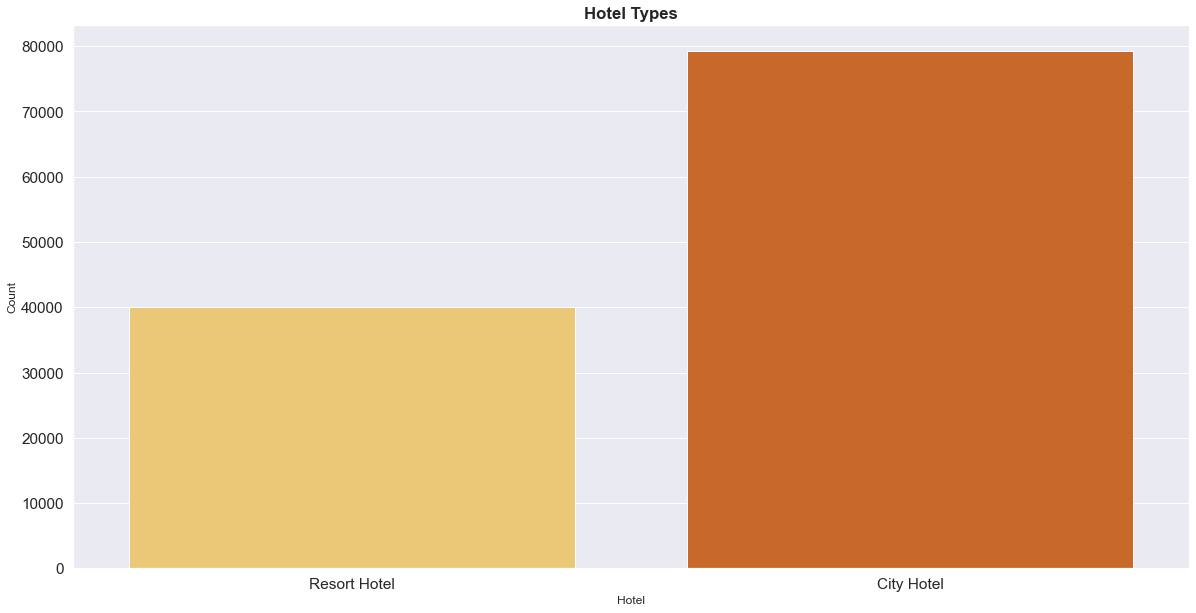

In [34]:
plt.figure(figsize=(20,10))

sns.countplot(x='hotel', data = df, palette='YlOrBr')

plt.title('Hotel Types', weight='bold')

plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Как видим из данных ниже, City Hotel бронируют почти в 2 раза больше, чем Resort Hotel**

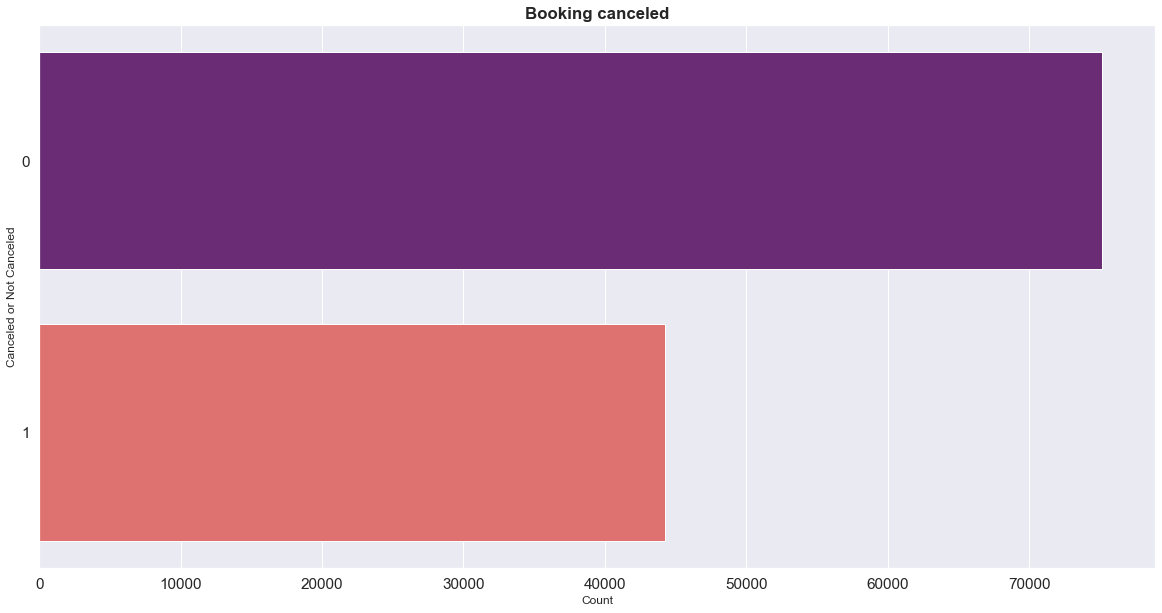

In [35]:
plt.figure(figsize=(20,10))

sns.countplot(y='is_canceled', data= df, palette='magma')

plt.title('Booking canceled', weight='bold')

plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)
plt.show()

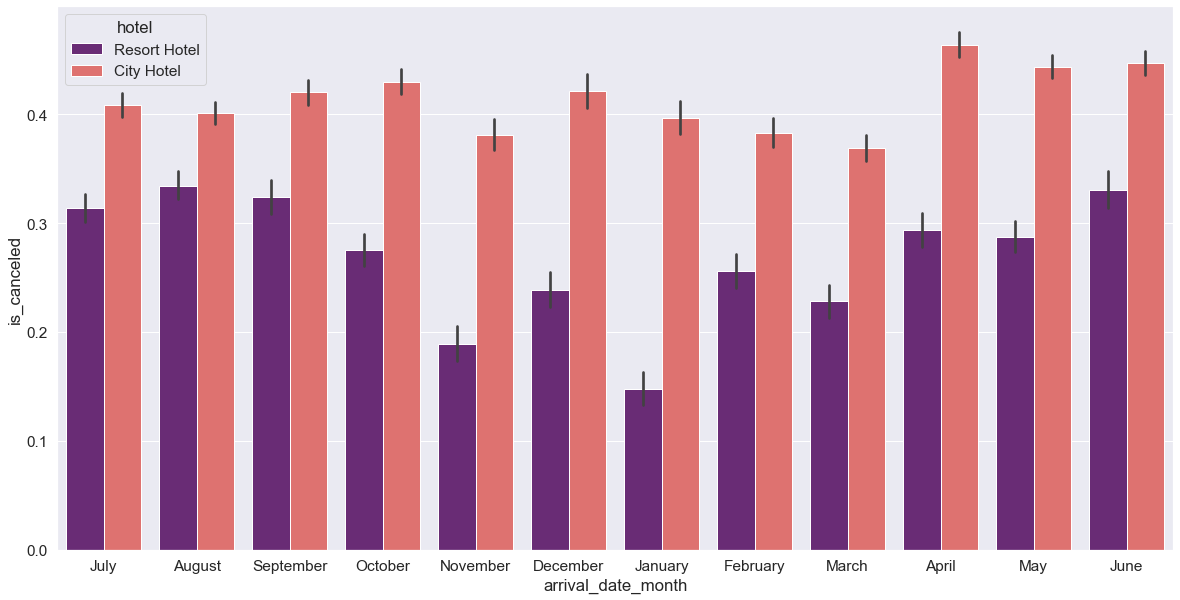

In [36]:
plt.figure(figsize = (20,10))

sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = df, palette='magma');

In [37]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

**Гости отменяют брони реже (статус == 1), чаще бронирование подтверждается (статус == 0)**

Text(0.5, 1.0, 'Canceled or not')

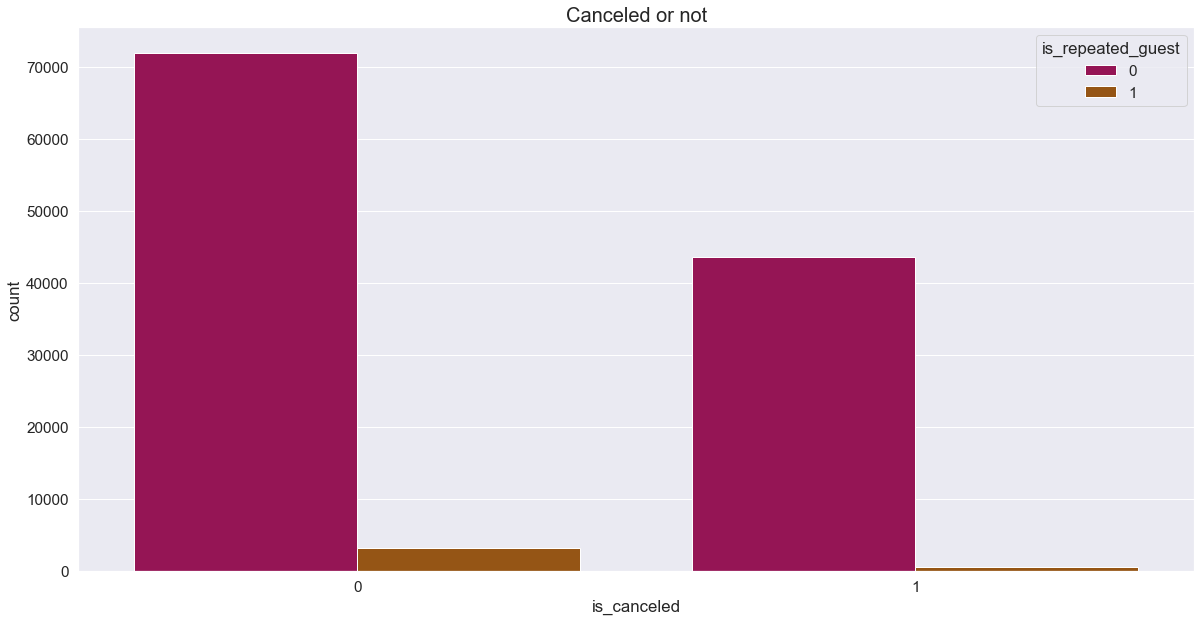

In [38]:
plt.figure(figsize=(20,10))

sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = df, palette="brg")

plt.title("Canceled or not", fontdict = {'fontsize': 20})

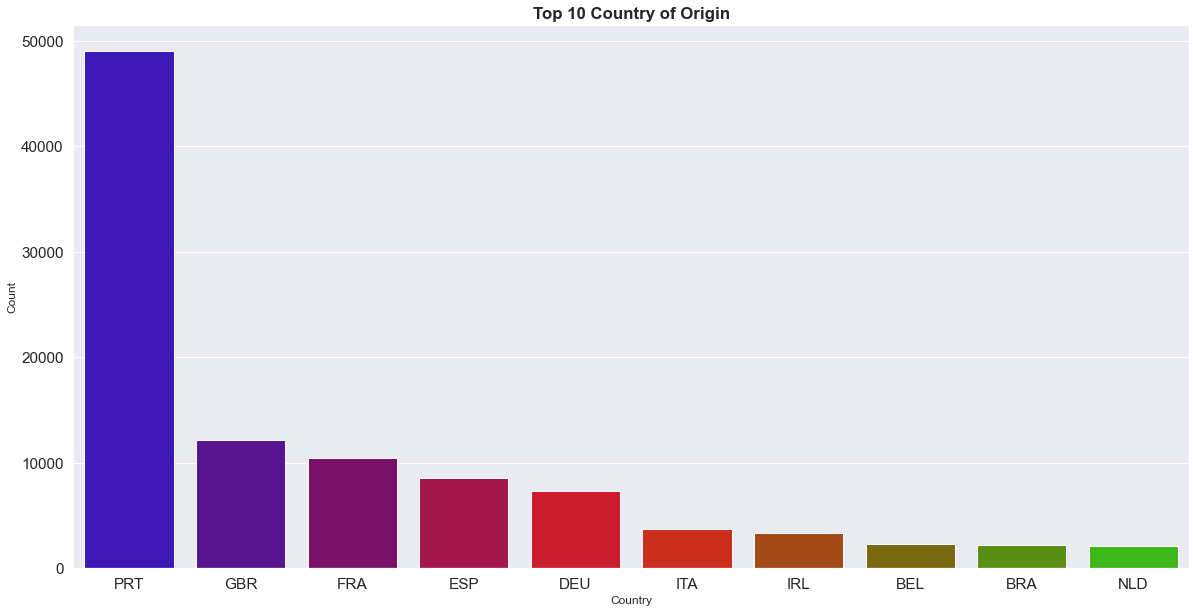

In [39]:
plt.figure(figsize=(20,10))

sns.countplot(x='country', data=df,
              order=pd.value_counts(df['country']).iloc[:10].index, palette="brg")

plt.title('Top 10 Country of Origin', weight='bold')

plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Больше всего гостей приезжает из Португалии**

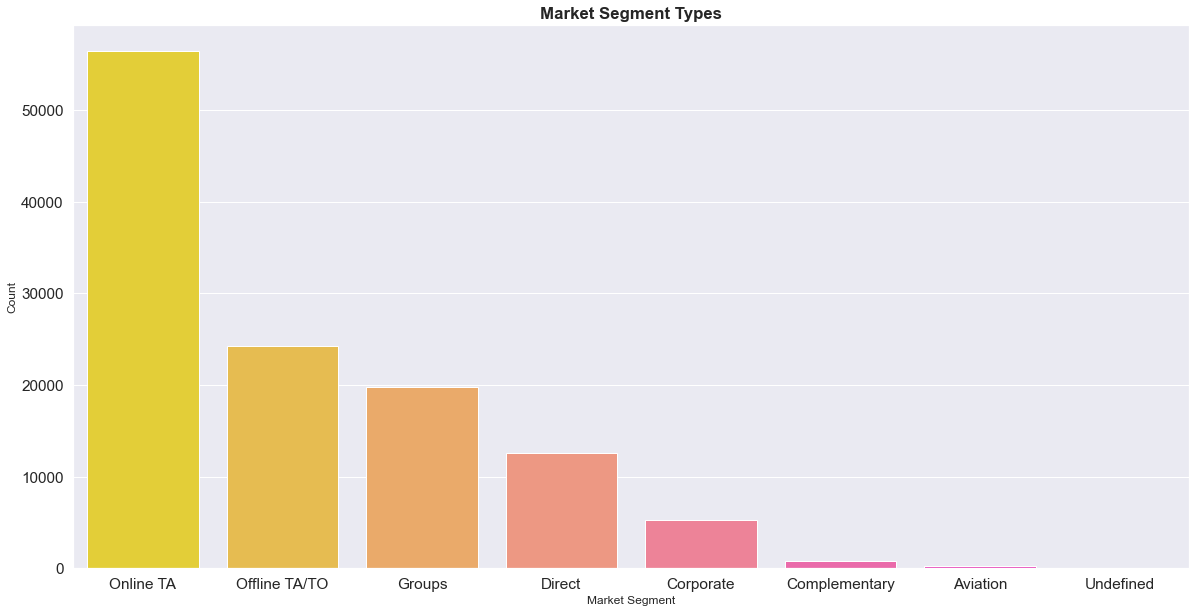

In [40]:
plt.figure(figsize=(20,10))

sns.countplot(df['market_segment'], palette='spring_r', 
             order=pd.value_counts(df['market_segment']).index)

plt.title('Market Segment Types', weight='bold')

plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Гости предпочитают бронировать отели через туристических агентов или туроператоров**

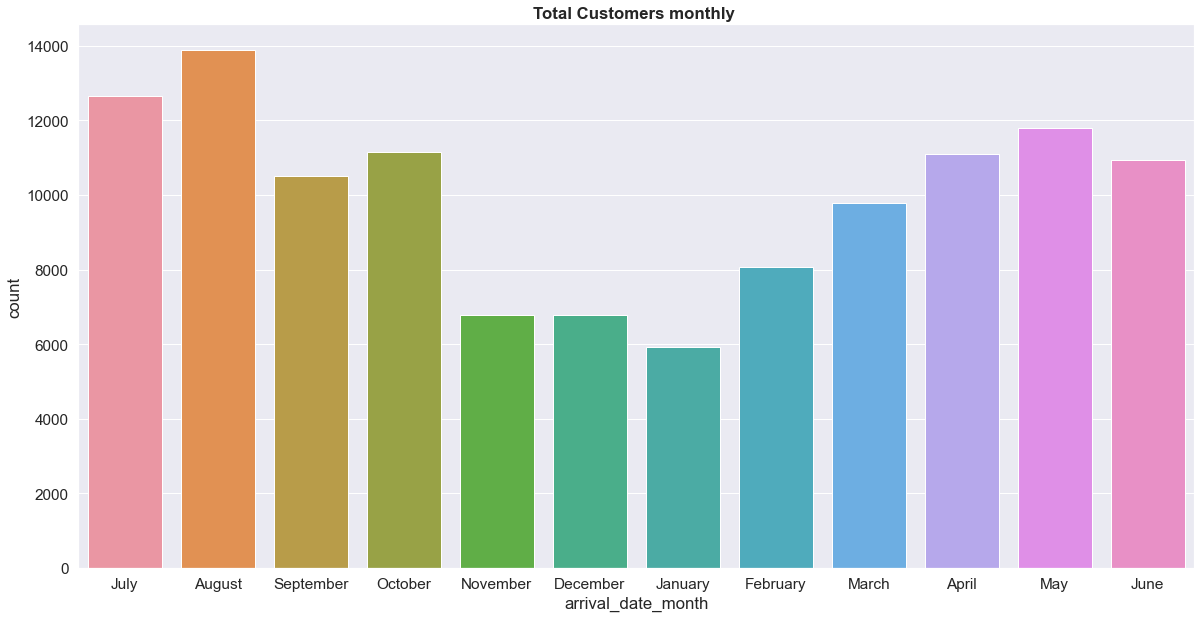

In [41]:
plt.figure(figsize=(20 ,10 ))

plt.title("Total Customers monthly ", weight='bold')

sns.countplot(df['arrival_date_month'])
plt.show()

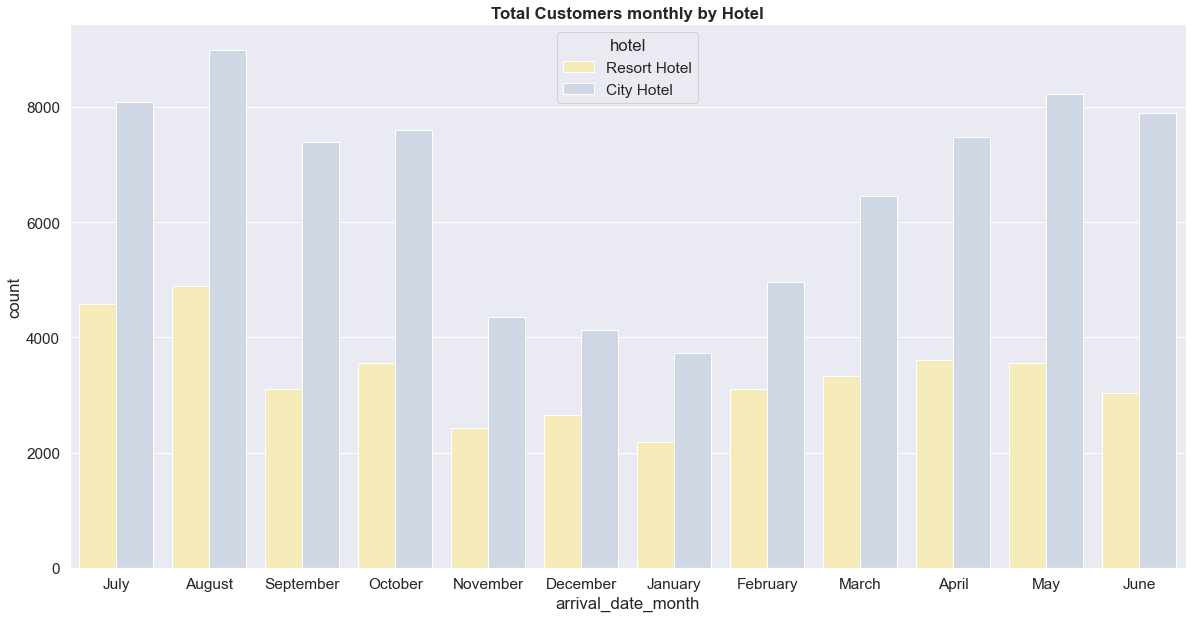

In [42]:
plt.figure(figsize =(20,10))

plt.title("Total Customers monthly by Hotel", weight='bold')

sns.countplot(x = "arrival_date_month", hue = 'hotel', palette='Pastel2_r', data = df)
plt.show()

**Больше всего гостей приезжают в отели с весны по зиму**

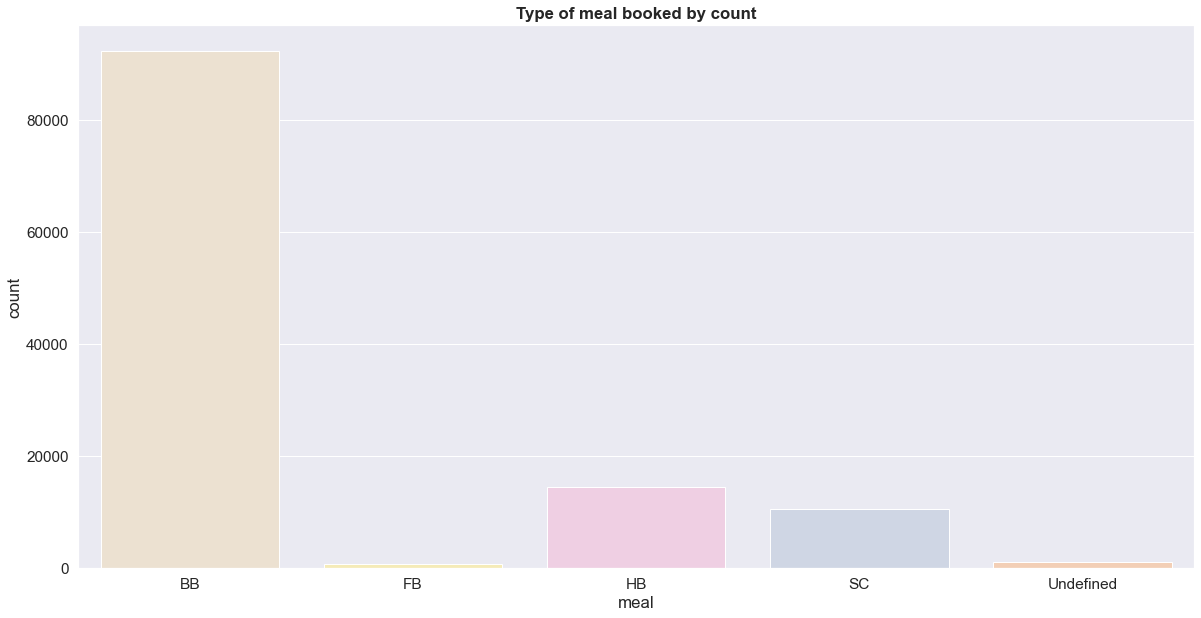

In [43]:
plt.figure(figsize=(20,10 ))

plt.title('Type of meal booked by count', weight='bold')

sns.countplot(df['meal'], palette='Pastel2_r')
plt.show()

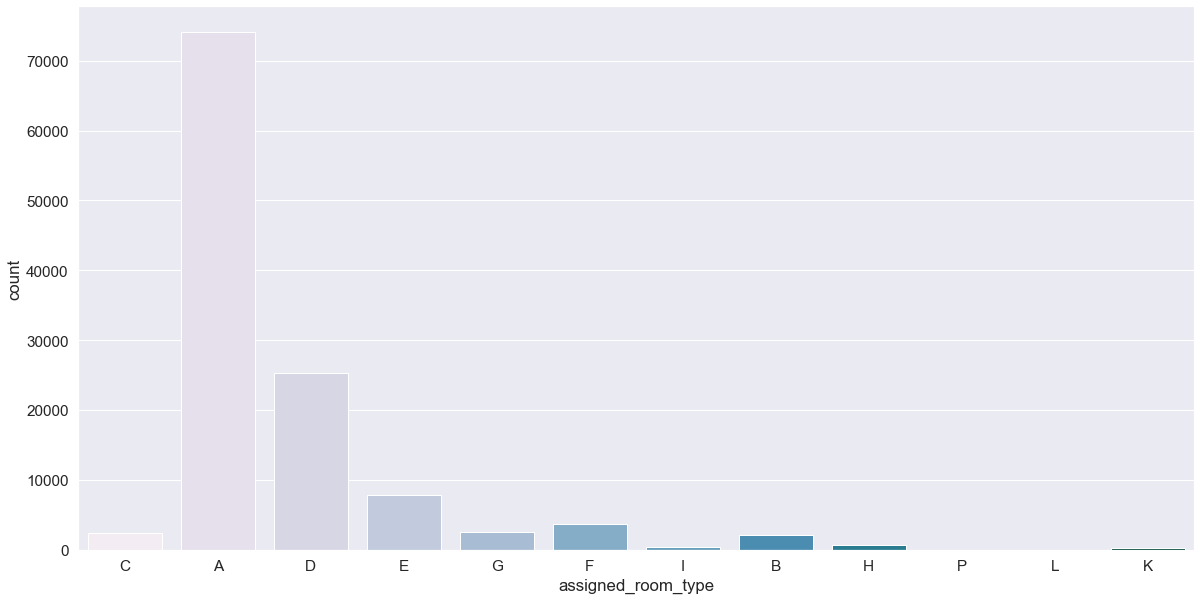

In [44]:
plt.figure(figsize=(20,10 ))

sns.countplot(df['assigned_room_type'], palette='PuBuGn')
plt.show()

### Построение новых признаков

In [45]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [46]:
df['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})                                                 

In [47]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,  'August':8,
                                                             'September':9, 'October':10, 'November':11, 'December':12})

In [48]:
def family(df):
    if ((df['adults'] > 0) & (df['children'] > 0)):
        val = 1
    elif ((df['adults'] > 0) & (df['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

In [49]:
def deposit(df):
    if ((df['deposit_type'] == 'No Deposit') | (df['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [50]:
def feature(df):

    df["is_family"] = df.apply(family, axis = 1)
    df["total_customer"] = df["adults"] + df["children"] + df["babies"]
    df["deposit_given"] = df.apply(deposit, axis=1)
    df["total_nights"] = df["stays_in_weekend_nights"]+ df["stays_in_week_nights"]
    return df

df = feature(df)

In [51]:
df = df.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

In [52]:
cor_df = df.copy()

In [53]:
le = LabelEncoder()

In [54]:
cor_df['meal'] = le.fit_transform(cor_df['meal'])
cor_df['distribution_channel'] = le.fit_transform(cor_df['distribution_channel'])
cor_df['reserved_room_type'] = le.fit_transform(cor_df['reserved_room_type'])
cor_df['assigned_room_type'] = le.fit_transform(cor_df['assigned_room_type'])
cor_df['agent'] = le.fit_transform(cor_df['agent'])
cor_df['customer_type'] = le.fit_transform(cor_df['customer_type'])
cor_df['reservation_status'] = le.fit_transform(cor_df['reservation_status'])
cor_df['market_segment'] = le.fit_transform(cor_df['market_segment'])

In [55]:
cor_df.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                                int64
country                            object
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
agent                               int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces       

In [56]:
cor_df.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.00,0.14,0.08,0.04,0.00,0.00,-0.00,-0.19,-0.23,0.01,...,0.07,0.05,0.10,-0.22,-0.04,-0.12,-0.06,-0.04,0.17,-0.25
is_canceled,0.14,1.00,0.29,0.02,0.01,0.01,-0.01,-0.00,0.02,-0.02,...,0.05,-0.07,0.05,-0.20,-0.23,-0.92,-0.01,0.05,0.48,0.02
lead_time,0.08,0.29,1.00,0.04,0.13,0.13,0.00,0.09,0.17,0.00,...,0.17,0.07,-0.06,-0.12,-0.10,-0.30,-0.04,0.07,0.38,0.16
arrival_date_year,0.04,0.02,0.04,1.00,-0.53,-0.54,-0.00,0.02,0.03,0.07,...,-0.06,-0.01,0.20,-0.01,0.11,-0.02,0.05,0.05,-0.07,0.03
arrival_date_month,0.00,0.01,0.13,-0.53,1.00,1.00,-0.03,0.02,0.02,-0.02,...,0.02,-0.03,0.08,0.00,0.03,-0.02,0.01,0.03,0.01,0.02
arrival_date_week_number,0.00,0.01,0.13,-0.54,1.00,1.00,0.07,0.02,0.02,-0.02,...,0.02,-0.03,0.08,0.00,0.03,-0.02,0.01,0.03,0.01,0.02
arrival_date_day_of_month,-0.00,-0.01,0.00,-0.00,-0.03,0.07,1.00,-0.02,-0.03,-0.01,...,0.02,0.01,0.03,0.01,0.00,0.01,0.01,0.01,-0.01,-0.03
stays_in_weekend_nights,-0.19,-0.00,0.09,0.02,0.02,0.02,-0.02,1.00,0.50,0.05,...,-0.05,-0.11,0.05,-0.02,0.07,0.01,0.05,0.10,-0.11,0.76
stays_in_week_nights,-0.23,0.02,0.17,0.03,0.02,0.02,-0.03,0.50,1.00,0.04,...,-0.00,-0.13,0.07,-0.02,0.07,-0.02,0.05,0.10,-0.08,0.94
meal,0.01,-0.02,0.00,0.07,-0.02,-0.02,-0.01,0.05,0.04,1.00,...,-0.01,0.04,0.06,-0.04,0.02,0.02,-0.04,-0.01,-0.09,0.05


In [57]:
cor_df.corr()["is_canceled"].sort_values()

reservation_status               -0.92
total_of_special_requests        -0.23
required_car_parking_spaces      -0.20
assigned_room_type               -0.18
booking_changes                  -0.14
is_repeated_guest                -0.08
customer_type                    -0.07
reserved_room_type               -0.06
previous_bookings_not_canceled   -0.06
agent                            -0.05
meal                             -0.02
is_family                        -0.01
arrival_date_day_of_month        -0.01
stays_in_weekend_nights          -0.00
arrival_date_week_number          0.01
arrival_date_month                0.01
arrival_date_year                 0.02
total_nights                      0.02
stays_in_week_nights              0.02
total_customer                    0.05
adr                               0.05
days_in_waiting_list              0.05
market_segment                    0.06
previous_cancellations            0.11
hotel                             0.14
distribution_channel     

In [58]:
cor_df = cor_df.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

In [59]:
df1 = df.copy()

In [60]:
df1.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
agent                               int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

In [61]:
df1 = pd.get_dummies(df1, columns = ['meal', 'market_segment', 'distribution_channel','reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

In [62]:
df1 = df1.apply(lambda col: le.fit_transform(df1['country']))

In [63]:
X = df1.drop(["is_canceled"], axis=1)
y = df1["is_canceled"]

### Отбор признаков

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [65]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

In [66]:
def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

### Random Forest

In [67]:
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.9997487226735907

Confusion Matrix:
 [[  1   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   0]
 [  0   0   5 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0  22   0]
 [  0   0   0 ...   0   0   2]]


In [68]:
RFC = RandomForestClassifier()

In [69]:
cv_scores = cross_val_score(RFC, X, y, cv = 8, scoring = 'accuracy')
print('Mean Score of CV: ', cv_scores.mean())

Mean Score of CV:  0.9997487229540122


In [70]:
#ROC(y_test, y_prob)

### Random Forest Model Tuning

In [71]:
rf_parameters = {"max_depth": [10,13],
                 "n_estimators": [10,100,500],
                 "min_samples_split": [2,5]}

In [72]:
rf_model = RandomForestClassifier()

In [73]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_parameters,
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 13], 'min_samples_split': [2, 5],
                         'n_estimators': [10, 100, 500]},
             verbose=2)

In [74]:
print('Best parameters: ' + str(rf_cv_model.best_params_))

Best parameters: {'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 100}


In [75]:
rf_tuned = RandomForestClassifier(max_depth = 13,
                                  min_samples_split = 2,
                                  n_estimators = 500)

print('Model: Random Forest Tuned\n')
model(rf_tuned, X_train, X_test, y_train, y_test)

Model: Random Forest Tuned

Accuracy Score: 0.9992182483178379

Confusion Matrix:
 [[  1   0   0 ...   0   0   0]
 [  0 102   0 ...   0   0   0]
 [  0   0   5 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0  22   0]
 [  0   0   0 ...   0   0   2]]


Text(0.5, 0, 'Feature Importances (%)')

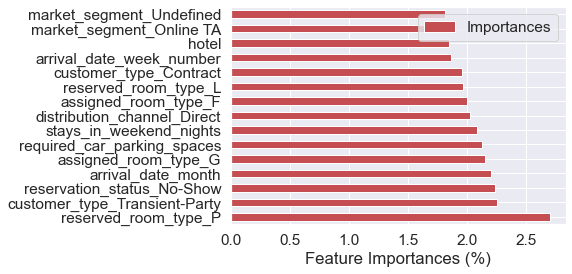

In [76]:
randomf = RandomForestClassifier()
rf_model1 = randomf.fit(X_train, y_train)

pd.DataFrame(data = rf_model1.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")